In [1]:
# Import libraries 
import requests
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_theme(style="darkgrid")
from matplotlib import pyplot as plt
import datetime
from datetime import date

%matplotlib inline

# Key is being removed due to privacy policy, the save cvs files will be located in the repository
key="Hidden"
name={
    1:"SONY",
    2:"NTDOY",
    3:"TCEHY",
    4: "MSFT"
}


In [2]:
# This example of saving TCEHY(3) AlphaVantage dataset to csv file, changing the corresponding index number in the name
# variable(again,the saved cvs files will be located in the repository)
url= f"https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol={name[3]}&apikey={key}&datatype=csv"
 
response=requests.get(url)
df=pd.read_csv(url)
df=df[(df["timestamp"] >= '2020-01-01') & (df["timestamp"] < '2022-04-01')]
df.to_csv("AlphaVantage.csv")

In [3]:
# import manually scriped csv file of covid cases(Due to the encrypted dataset on worldometer website, dataset is manually scripted)
df_C = pd.read_excel("INST414_Covid_Cases.xlsx")

In [4]:
df_C.head()

,Case_ID,Date,Country/Area,Cases
0,1,2020-02-15,USA,12
1,2,2020-03-15,USA,8588
2,3,2020-04-15,USA,570862
3,4,2020-05-15,USA,1082908
4,5,2020-06-15,USA,1081287


In [5]:
# import manually scriped csv file of games sales(Due to the encrypted dataset on vgcharts website, dataset is manually scripted)
df_G = pd.read_excel("Games_Sale.xlsx")

In [6]:
df_G

,Game_ID,Date,Platform,Sales_Total
0,1,2020-02-15,PS4,141650
1,2,2020-03-15,PS4,261588
2,3,2020-04-15,PS4,385082
3,4,2020-05-15,PS4,226444
4,5,2020-06-15,PS4,241039
...,...,...,...,...
125,22,2021-11-15,NS,3365006
126,23,2021-12-15,NS,4995259
127,24,2022-01-15,NS,1310917
128,25,2022-02-15,NS,1330856


<AxesSubplot:title={'center':'Games Sold by Date'}, xlabel='Date', ylabel='Sales Total'>

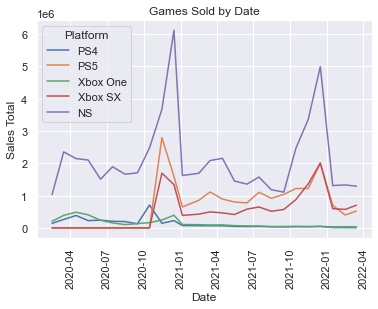

In [7]:
# line graph of game sales by date
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Sales Total')
plt.title("Games Sold by Date")
sns.lineplot(data=df_G, x="Date", y="Sales_Total", hue="Platform")

In [8]:
# merge covid dataset and game sales dataset and ranamed Game_Covid
Game_Covid = pd.merge(df_G,df_C,how='left',on=['Date'])

In [9]:
Game_Covid 

,Game_ID,Date,Platform,Sales_Total,Case_ID,Country/Area,Cases
0,1,2020-02-15,PS4,141650,1,USA,12
1,2,2020-03-15,PS4,261588,2,USA,8588
2,3,2020-04-15,PS4,385082,3,USA,570862
3,4,2020-05-15,PS4,226444,4,USA,1082908
4,5,2020-06-15,PS4,241039,5,USA,1081287
...,...,...,...,...,...,...,...
125,22,2021-11-15,NS,3365006,22,USA,9750222
126,23,2021-12-15,NS,4995259,23,USA,13379149
127,24,2022-01-15,NS,1310917,24,USA,21989298
128,25,2022-02-15,NS,1330856,25,USA,27135652


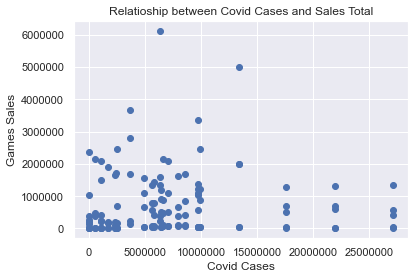

In [10]:
# Create a scatter plot of Relatioship between Covid Cases and Sales Total
plt.scatter(Game_Covid['Cases'], Game_Covid['Sales_Total'])
plt.xlabel('Covid Cases')
plt.ylabel('Games Sales')
plt.title("Relatioship between Covid Cases and Sales Total")
plt.ticklabel_format(style = 'plain')

In [11]:
# create 3 clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(Game_Covid[['Cases','Sales_Total']])
y_predicted
Game_Covid['cluster']=y_predicted

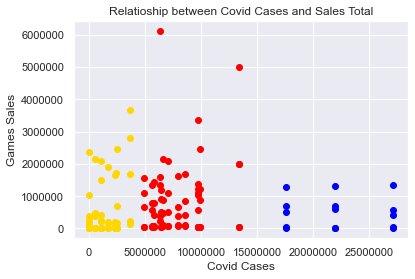

In [12]:
# Create clusters of scatter plot of Relatioship between Covid Cases and Sales Total
df1 = Game_Covid[Game_Covid.cluster==0]
df2 = Game_Covid[Game_Covid.cluster==1]
df3 = Game_Covid[Game_Covid.cluster==2]
plt.scatter(df1['Cases'], df1['Sales_Total'],color='blue')
plt.scatter(df2['Cases'], df2['Sales_Total'],color='Gold')
plt.scatter(df3['Cases'], df3['Sales_Total'],color='red')
plt.xlabel('Covid Cases')
plt.ylabel('Games Sales')
plt.title("Relatioship between Covid Cases and Sales Total")
plt.ticklabel_format(style = 'plain')

In [13]:
Game_Covid["Date"] = Game_Covid["Date"].dt.strftime('%Y-%m-%d')

Text(0.5, 1.0, 'Bar Graph of Covide Case by Date Sales')

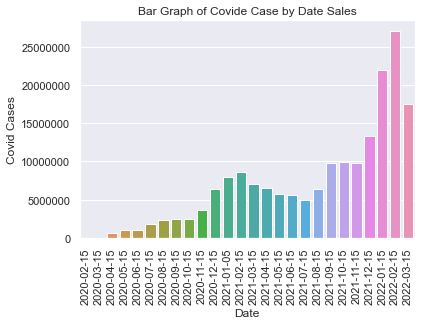

In [14]:
# Create a bar graph of Covide Case by Date Sales
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation=90)
sns.barplot(data=Game_Covid, x="Date", y="Cases")
plt.xlabel('Date')
plt.ylabel('Covid Cases')
plt.title("Bar Graph of Covide Case by Date Sales")

<AxesSubplot:title={'center':'Games Sold by Date'}, xlabel='Date', ylabel='Sales Total'>

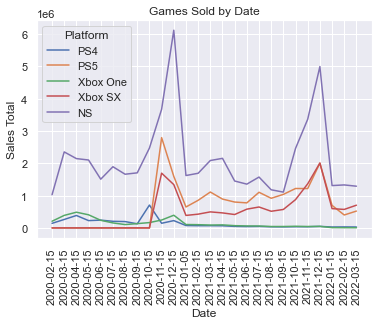

In [15]:
# Create a line graph of game sale by date in each platforms
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Sales Total')
plt.title("Games Sold by Date")
sns.lineplot(data=Game_Covid, x="Date", y="Sales_Total", hue="Platform")

<AxesSubplot:title={'center':'Relatioship between Sales Total and Covid Cases '}, xlabel='Covid Cases', ylabel='Sales Total'>

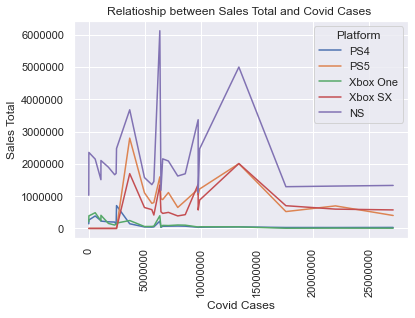

In [16]:
# Create a line graph of game sale by covid cases in each platforms
plt.xticks(rotation=90)
plt.xlabel('Covid Cases')
plt.ylabel('Sales Total')
plt.title("Relatioship between Sales Total and Covid Cases ")
plt.ticklabel_format(style = 'plain')
sns.lineplot(data=Game_Covid, x="Cases", y="Sales_Total", hue="Platform")

In [17]:
# import AlphaVantage.csv(stocks dataset)
df_stock = pd.read_csv("AlphaVantage.csv")
df_stock

,Unnamed: 0,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,2,2022-03-31,54.300,55.00,37.92,46.42,46.4200,128363819,0.0000
1,3,2022-02-28,62.705,63.00,53.31,53.79,53.7900,87641032,0.0000
2,4,2022-01-31,58.110,62.94,54.72,62.54,62.5400,115114978,1.5528
3,5,2021-12-31,60.340,61.09,54.38,58.30,56.7683,99410176,0.0000
4,6,2021-11-30,60.200,65.05,57.87,58.45,56.9143,163517968,0.0000
5,7,2021-10-29,59.550,66.04,56.89,60.79,59.1929,113766858,0.0000
6,8,2021-09-30,62.970,67.67,56.06,59.77,58.1997,123115538,0.0000
7,9,2021-08-31,61.150,62.90,53.47,61.66,60.0400,172756378,0.0000
8,10,2021-07-30,75.300,75.40,55.77,61.20,59.5921,133252645,0.0000
9,11,2021-06-30,80.810,81.35,73.82,75.30,73.3216,42398196,0.0000
